> # **DECISION TREE**
> Decision Trees are versatile Machine Learning algorithms that can perform both `classification and regression tasks, and even multioutput tasks` They are very powerful algorithms, capable of fitting complex datasets.<br>
> Decision Trees are also the fundamental components of `Random Forests`, which are among the `most powerful Machine Learning algorithms` available today.

In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

data = load_iris(as_frame=True)
X = data.data[["petal length (cm)", "petal width (cm)"]].values
y = data.target

<hr>

> ### CLASSIFICATION

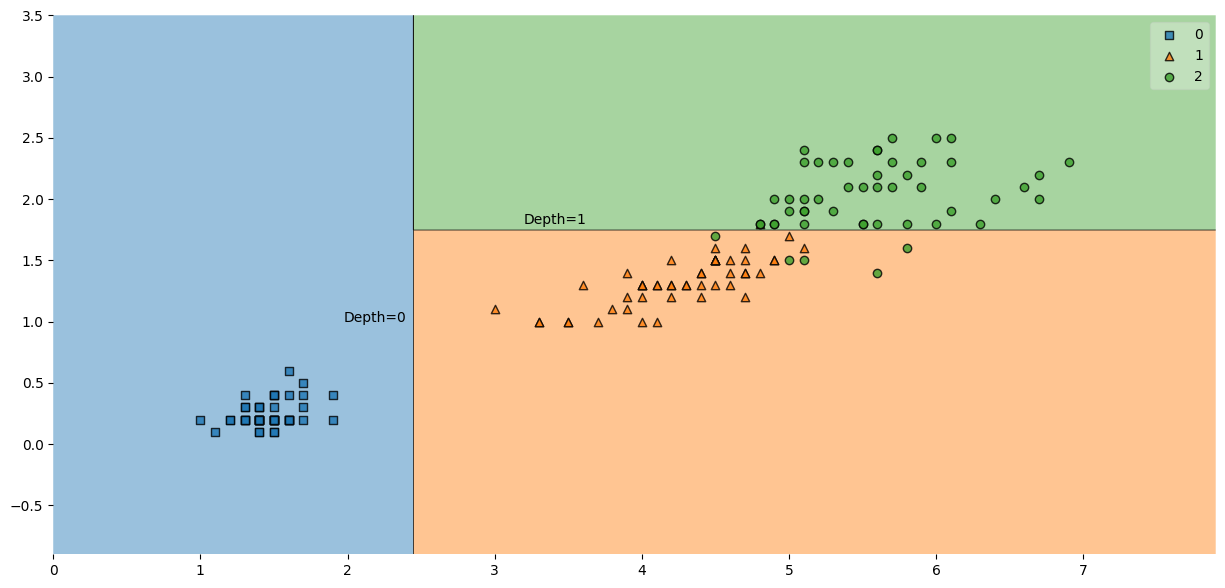

In [33]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X, y)
plt.figure(figsize=(15, 7))
plot_decision_regions(
    X, y.values, dt
)
th0, th1 = dt.tree_.threshold[[0, 2]]
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=10)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=10)
plt.show()

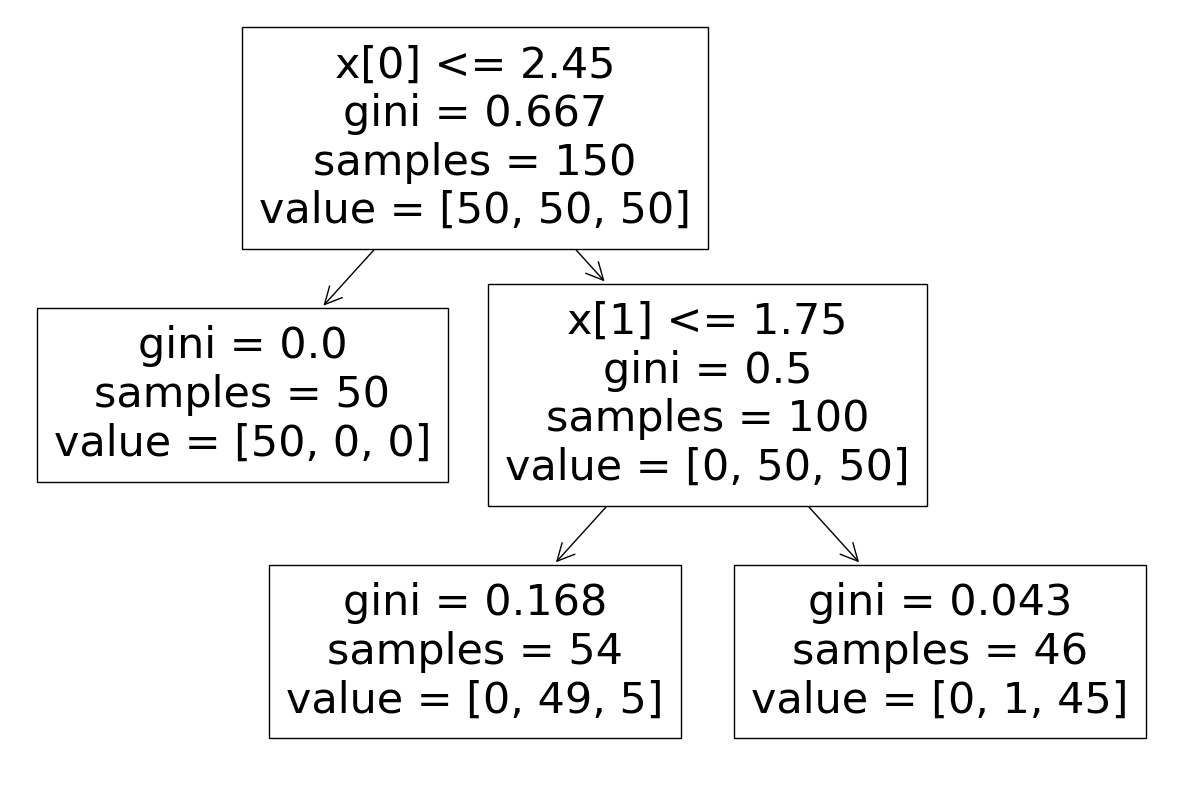

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(dt)
plt.show()

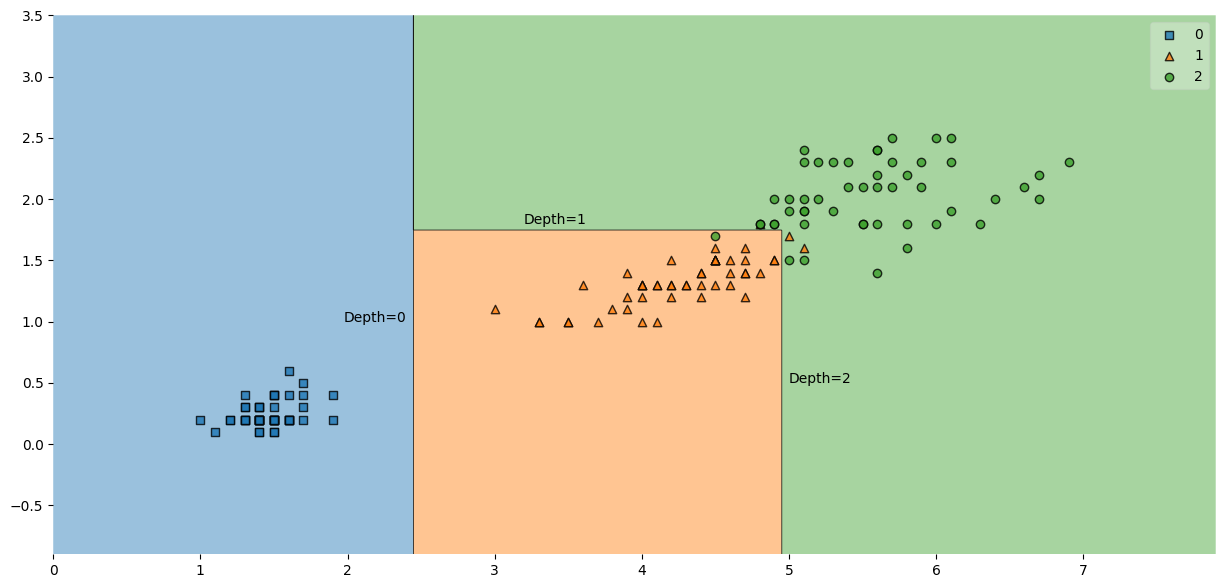

In [45]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)
plt.figure(figsize=(15, 7))
plot_decision_regions(
    X, y.values, dt
)
th0, th1, th2a, th2b = dt.tree_.threshold[[0, 2, 3, 6]]
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=10)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=10)
plt.text(th2a + 0.05, 0.5, "Depth=2", fontsize=10)
plt.show()

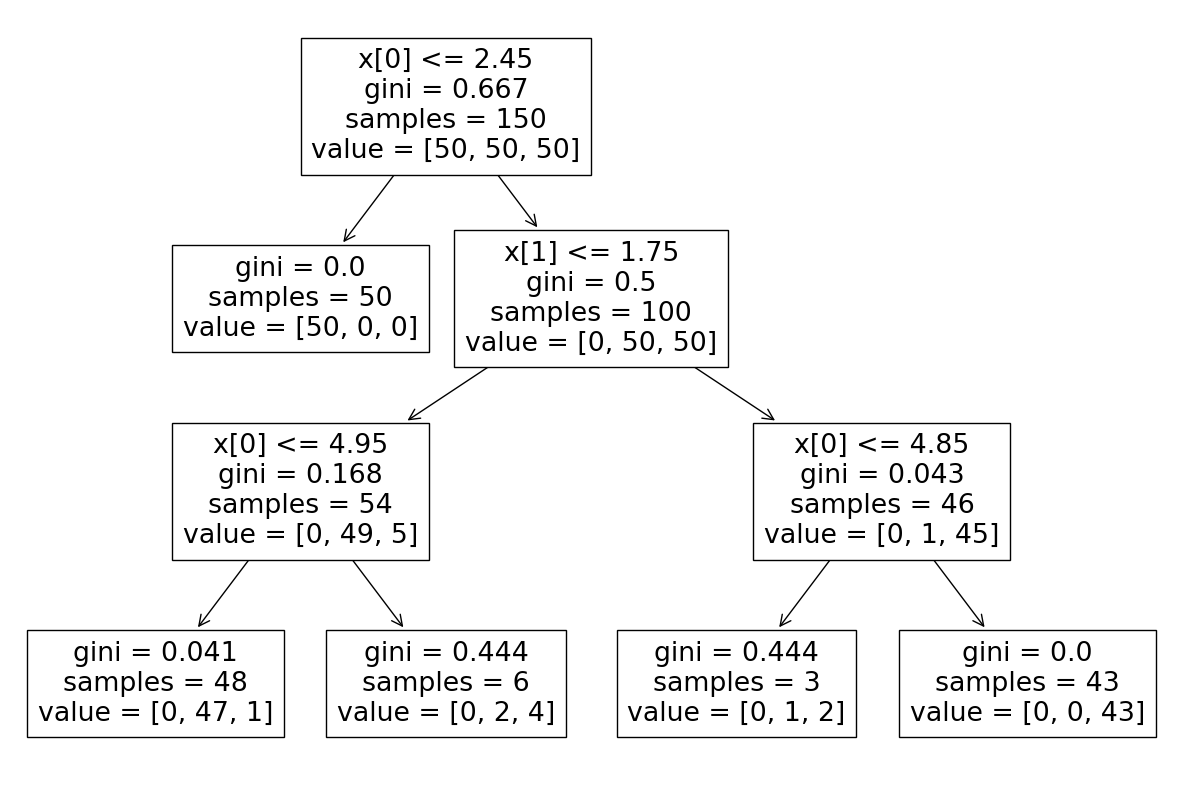

In [46]:
plt.figure(figsize=(15, 10))
plot_tree(dt)
plt.show()

> ### CART ALGORITHM
> Scikit-Learn uses `CART algorithm`, which produces only `binary trees`, meaning where split nodes always have exactly two children. However algorithm such as `ID3`, can produce decision trees with `nodes more than two childrens`.<BR><BR>
> As you can see, the CART algorithm is a `greedy algorithm`: it greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution.

> ### GINI IMPURITY AND ENTROPY
> - `Gini Impurity`: a node is “pure” (gini=0) if all training instances it applies to belong to the same class.<br><br>
> 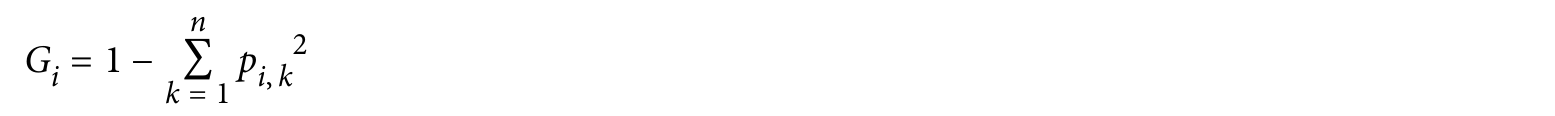
> - `Entropy`: By default, the Gini impurity measure is used, but you can select the entropy impurity measure instead by setting the criterion hyperparameter to "entropy". all training instances it applies to belong to the same class.<br><br>
> 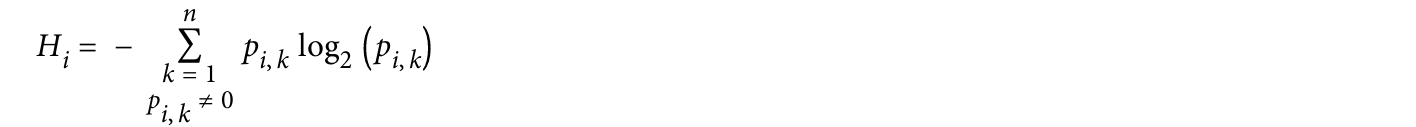<br><br>
> So should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. `Gini impurity is slightly faster to compute`, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while `entropy tends to produce slightly more balanced trees`.

> ### COMPUTATIONAL COMPLEXITY
> - Decision Trees are generally approximately balanced, so traversing the Decision Tree requires going through roughly O`(log2(m))`nodes.<BR>
> - However, the training algorithm compares all features (or less if max_features is set) on all samples at each node. This results in a training complexity of `O(n × m log(m))`.

<hr>

> ### REGULARIZATION HYPERPARAMETER

In [68]:
dt = DecisionTreeClassifier(
    criterion='gini',
    splitter='best', # for (value=`random`) the data will be randomly splittd and the time require to calculate best splitting feature will be reduced as well.
    max_depth=100, # Higher value overfitting, lower value underfitting
    min_samples_split=2, # the minimum number of samples a node must have before it can be split
    min_samples_leaf=2, #the minimum number of samples a leaf node must have
    max_features=1, # max number of samples used to split the data at each node
    random_state=42,
    max_leaf_nodes=100,
    min_impurity_decrease=0.001
)

In [69]:
dt.fit(X, y)

DecisionTreeClassifier(max_depth=100, max_features=1, max_leaf_nodes=100,
                       min_impurity_decrease=0.001, min_samples_leaf=2,
                       random_state=42)

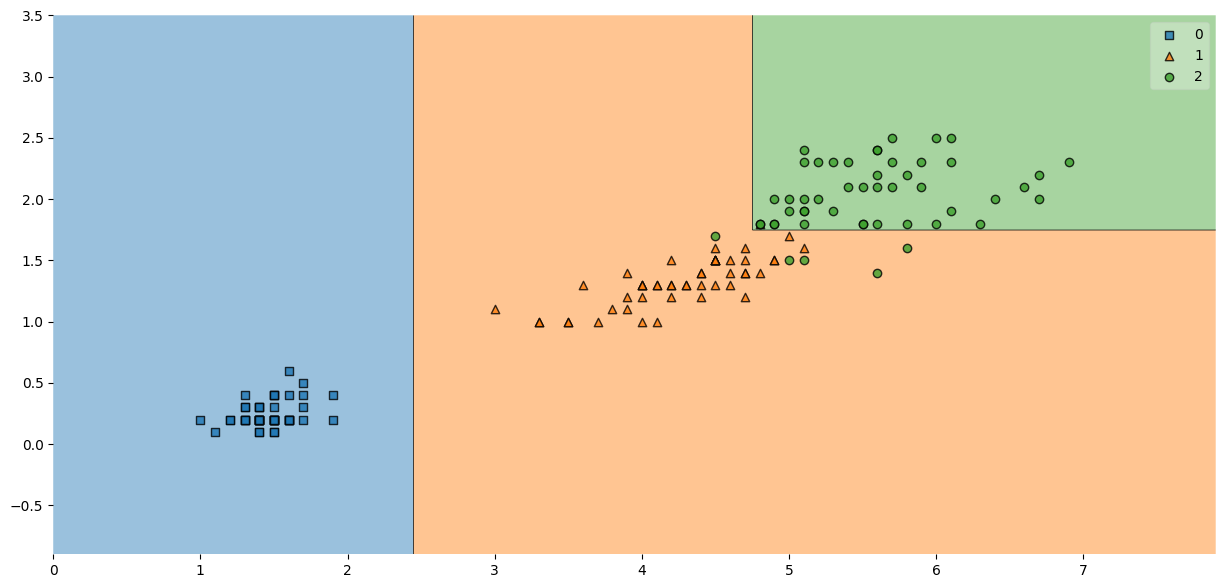

In [70]:
dt.fit(X, y)
plt.figure(figsize=(15, 7))
plot_decision_regions(
    X, y.values, dt
)
plt.show()

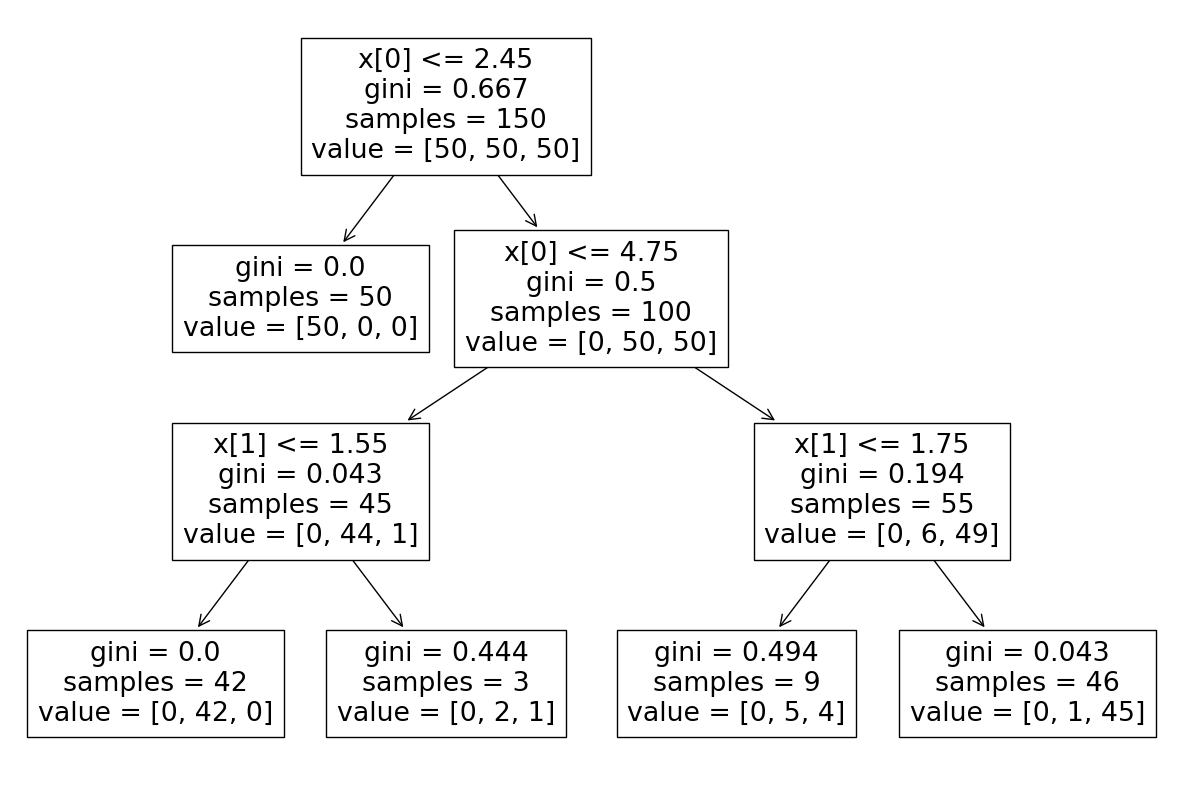

In [71]:
plt.figure(figsize=(15, 10))
plot_tree(dt)
plt.show()

In [73]:
dt.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.556, 0.444]])

In [80]:
from sklearn.metrics import f1_score
f1_score(y, dt.predict(X), average="weighted")

0.9599358974358975

<HR>

> ### REGRESSION

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [85]:
X, y = make_regression(
    n_samples=1000,
    n_features=5,
    n_informative=3,
    n_targets=1,
    noise=10
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [93]:
rt = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best', # for (value=`random`) the data will be randomly splittd and the time require to calculate best splitting feature will be reduced as well.
    max_depth=100, # Higher value overfitting, lower value underfitting
    min_samples_split=5, # the minimum number of samples a node must have before it can be split
    min_samples_leaf=5, #the minimum number of samples a leaf node must have
    max_features=3, # max number of samples used to split the data at each node
    random_state=42,
    max_leaf_nodes=100,
    min_impurity_decrease=0.001
)
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=100, max_features=3, max_leaf_nodes=100,
                      min_impurity_decrease=0.001, min_samples_leaf=5,
                      min_samples_split=5, random_state=42)

In [89]:
y_pred = rt.predict(X_test) # the predicted value for each region is always the average target value of the instances in that region.
r2_score(y_test,y_pred)

0.8120631696138618

> ### FEATURE IMPORTANCE
> An array of values represents the number of times that perticular columne is used as `splitting feature`.

In [94]:
rt.feature_importances_

array([0.18649087, 0.08321621, 0.00203845, 0.72721181, 0.00104265])

<hr>

> ### DECISION TREES HAVE `HIGH VARIANCE`
> - The main issue with Decision Trees is that they have quite a high variance: Small changes to a hyperparameter or to the data may produce very different models<br><br>
> - For choosimg the perfect set of Hyperparameters requires GridSearchCv - Cross Validations

In [121]:
import numpy as np
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg_1 = DecisionTreeRegressor()
tree_reg_2 = DecisionTreeRegressor(max_depth=3)
tree_reg_1.fit(X_quad, y_quad)
tree_reg_2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3)

In [125]:
temp_x = np.linspace(-0.4944, 0.4868, 200).reshape(-1, 1)
temp_y_pred1 = tree_reg_1.predict(temp_x)
temp_y_pred2 = tree_reg_2.predict(temp_x)

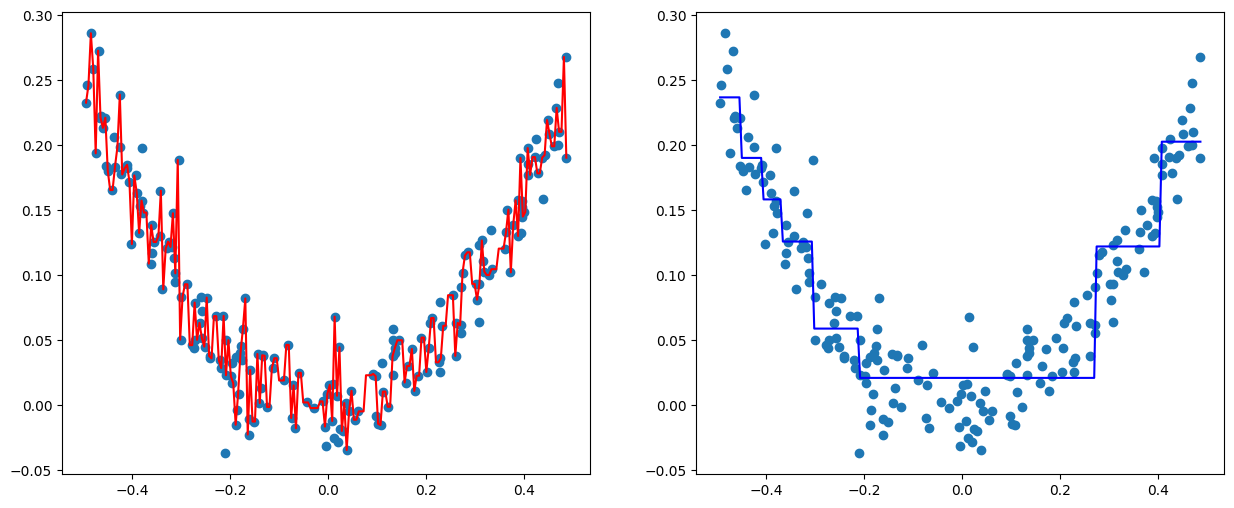

In [134]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
fig.set_figwidth(15)
fig.set_figheight(6)

ax[0].scatter(X_quad, y_quad)
ax[0].plot(temp_x, temp_y_pred1, color = 'red')
ax[1].scatter(X_quad, y_quad)
ax[1].plot(temp_x, temp_y_pred2, color = 'blue')

plt.show()